In [316]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [227]:
SEQUENCE_COLUMNS = ['vehicles_sequence','events_sequence','seconds_to_incident_sequence','train_kph_sequence',
            'dj_ac_state_sequence','dj_dc_state_sequence']

df = pd.read_csv('../data/sncb_data_challenge.csv',delimiter=';')
df = df.drop(columns=['Unnamed: 0'])

for col in SEQUENCE_COLUMNS:
    df[col] = df[col].apply(lambda x:x.strip("[]").split(", "))


df['incident_type_cat'] = df['incident_type'].apply(lambda x:f"type_{x}")

# the data contains data with pre and post events of incidents
# creating a seperate data is necessary for pre events to remove data leakage

def get_idx(ls):

    for idx in range(0,len(ls)-1):

        if int(ls[idx+1])>0:
            return idx
        
    return idx+1


df['index_sequence'] = df['seconds_to_incident_sequence'].apply(lambda x:get_idx(x))


def get_events(ls,idx):

    pre_incident_ls = ls[:idx]
    post_incident_ls = []
    if idx+1 < len(ls):
        post_incident_ls = ls[idx+1:]

    if len(pre_incident_ls) == 0 :
        pre_incident_ls = np.nan

    if len(post_incident_ls) == 0:
        post_incident_ls = np.nan
        
    return pre_incident_ls, post_incident_ls
    

for col in SEQUENCE_COLUMNS:
    df[[f'pre_incident_{col}',f'post_incident_{col}']] = df[[col,'index_sequence']]\
                                                         .apply(lambda row:get_events(row[col],row['index_sequence']),\
                                                                axis=1).apply(pd.Series)

In [229]:
df.isnull().sum()

# There is 1 case with no events pre incidents 
# There is 19 incidents with no events after post incidents

incident_id                                    0
vehicles_sequence                              0
events_sequence                                0
seconds_to_incident_sequence                   0
approx_lat                                     0
approx_lon                                     0
train_kph_sequence                             0
dj_ac_state_sequence                           0
dj_dc_state_sequence                           0
incident_type                                  0
incident_type_cat                              0
index_sequence                                 0
pre_incident_vehicles_sequence                 1
post_incident_vehicles_sequence               19
pre_incident_events_sequence                   1
post_incident_events_sequence                 19
pre_incident_seconds_to_incident_sequence      1
post_incident_seconds_to_incident_sequence    19
pre_incident_train_kph_sequence                1
post_incident_train_kph_sequence              19
pre_incident_dj_ac_s

In [230]:
df.head()

incident_id                                  vehicles_sequence  \
0      4432881  [609, 609, 609, 609, 609, 609, 609, 609, 609, ...   
1      4432943  [526, 526, 526, 526, 526, 526, 526, 526, 526, ...   
2      4432955  [592, 592, 592, 592, 592, 592, 592, 592, 592, ...   
3      4433021  [576, 576, 576, 576, 576, 576, 576, 576, 576, ...   
4      4433129  [634, 634, 634, 634, 634, 634, 634, 634, 634, ...   

                                     events_sequence  \
0  [2744, 4004, 2852, 4110, 2854, 4396, 1132, 414...   
1  [2744, 4148, 4394, 1566, 1570, 4396, 3634, 412...   
2  [4394, 1566, 1570, 4114, 4168, 4168, 4156, 406...   
3  [4066, 4066, 4066, 4066, 4068, 2742, 4026, 270...   
4  [4002, 4032, 4028, 2852, 4026, 4110, 2742, 285...   

                        seconds_to_incident_sequence  approx_lat  approx_lon  \
0  [-5510, -5510, -5507, -5507, -5506, -5506, -55...   50.876601    4.718143   
1  [-8573, -8573, -8032, -8032, -8032, -7859, -61...   51.037435    4.431218   
2  [-12291, -12291, -12291, -10932, -10932, -1091...   50.864083    4.162115   
3  [-14351, -14204, -13890, -13383, -12739, -1243...   51.183220    4.276025   
4  [-224, -224, -223, -222, -222, -222, -220, -22...   50.818727    3.253601   

                                  train_kph_sequence  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 29.1,...   
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
3  [0.0, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.0, ...   
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                dj_ac_state_sequence  \
0  [False, False, False, False, False, False, Fal...   
1  [False, False, False, False, False, False, Fal...   
2  [False, False, False, False, False, False, Fal...   
3  [False, False, False, False, False, False, Fal...   
4  [False, False, False, False, False, False, Fal...   

                                dj_dc_state_sequence  incident_type  ...  \
0  [False, False, False, False, False, False, Fal...              4  ...   
1  [True, True, True, True, True, True, True, Tru...             13  ...   
2  [True, True, True, True, True, False, True, Tr...             14  ...   
3  [True, True, True, True, True, True, True, Tru...              2  ...   
4  [False, False, False, False, False, False, Fal...             14  ...   

                        pre_incident_events_sequence  \
0  [2744, 4004, 2852, 4110, 2854, 4396, 1132, 414...   
1  [2744, 4148, 4394, 1566, 1570, 4396, 3634, 412...   
2  [4394, 1566, 1570, 4114, 4168, 4168, 4156, 406...   
3  [4066, 4066, 4066, 4066, 4068, 2742, 4026, 270...   
4  [4002, 4032, 4028, 2852, 4026, 4110, 2742, 285...   

                       post_incident_events_sequence  \
0  [2744, 4002, 2852, 4110, 2854, 2982, 4148, 270...   
1  [2956, 4180, 2658, 3254, 4080, 2708, 4124, 412...   
2  [4028, 4050, 2752, 4026, 4032, 2742, 2708, 403...   
3  [4068, 2708, 2742, 4120, 2708, 4026, 4016, 402...   
4  [4394, 152, 4396, 1962, 4396, 1962, 4066, 4068...   

           pre_incident_seconds_to_incident_sequence  \
0  [-5510, -5510, -5507, -5507, -5506, -5506, -55...   
1  [-8573, -8573, -8032, -8032, -8032, -7859, -61...   
2  [-12291, -12291, -12291, -10932, -10932, -1091...   
3  [-14351, -14204, -13890, -13383, -12739, -1243...   
4  [-224, -224, -223, -222, -222, -222, -220, -22...   

          post_incident_seconds_to_incident_sequence  \
0  [219, 219, 222, 222, 223, 224, 224, 225, 225, ...   
1  [19, 20, 21, 21, 27, 177, 682, 699, 780, 823, ...   
2  [292, 292, 293, 293, 293, 472, 473, 477, 478, ...   
3  [44, 64, 81, 107, 159, 294, 295, 297, 418, 419...   
4  [47, 47, 77, 77, 182, 182, 298, 298, 800, 800,...   

                     pre_incident_train_kph_sequence  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 29.1,...   
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
3  [0.0, 0.0, 0.0, 0.015625, 0.0, 0.0, 0.0, 0.0, ...   
4  [0.0, 0.

In [231]:
df.shape

(1011, 24)

In [232]:
# Is Incident ID different for each incident so not a valuable 
df.incident_id.nunique() == df.shape[0]

True

In [233]:
df['incident_type'].value_counts()

incident_type
13    318
99    175
14    149
2     119
9     117
4      78
11     26
17     10
6       6
3       5
16      4
7       4
Name: count, dtype: int64

<Axes: xlabel='incident_type'>

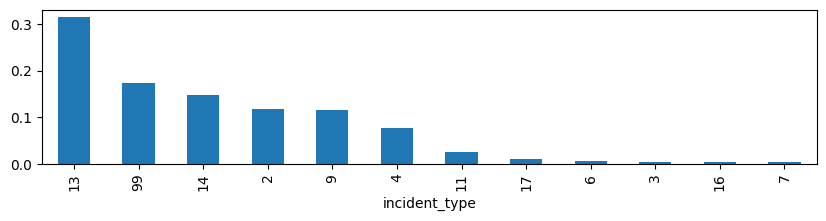

In [234]:
# Incident Type Distribution in the dataset
plt.figure(figsize=(10,2))
df['incident_type'].value_counts(normalize=True).plot(kind='bar')

# Clearly incident type 13 has the highest number of incidents in this case and seems to be common 
# and the incident type 7 doesn't happens often assuming from the distirbution 

In [199]:
# Types of column in the data
df.dtypes
# incident_id is just a key and holds no value 
# vehicles_sequence, event_sequence, seconds_to_incident_sequence, train_kph_sequence, 
# dj_ac_state_sequence and dj_dc_state_sequence are the main feature and they are in the form of list
# approx_lat , approx_lon are float type datapoints

incident_id                                     int64
vehicles_sequence                              object
events_sequence                                object
seconds_to_incident_sequence                   object
approx_lat                                    float64
approx_lon                                    float64
train_kph_sequence                             object
dj_ac_state_sequence                           object
dj_dc_state_sequence                           object
incident_type                                   int64
index_sequence                                  int64
pre_incident_vehicles_sequence                 object
post_incident_vehicles_sequence                object
pre_incident_events_sequence                   object
post_incident_events_sequence                  object
pre_incident_seconds_to_incident_sequence      object
post_incident_seconds_to_incident_sequence     object
pre_incident_train_kph_sequence                object
post_incident_train_kph_sequ

## Check the variance of each column pre-incident

In [249]:
SELECTED_COL = ['pre_incident_vehicles_sequence', 'pre_incident_events_sequence', 'pre_incident_train_kph_sequence', 'pre_incident_dj_ac_state_sequence', 'pre_incident_dj_dc_state_sequence', 'incident_type']
ex_df = df[SELECTED_COL]
ex_df = ex_df.dropna().reset_index(drop=True)

In [250]:
def get_unique_events(x):

    x = set(x)
    return len(x)


for col in ['pre_incident_vehicles_sequence','pre_incident_events_sequence','pre_incident_train_kph_sequence','pre_incident_dj_ac_state_sequence','pre_incident_dj_dc_state_sequence']:
    ex_df[f'unique_{col}'] = ex_df[col].apply(lambda x:get_unique_events(x))


In [251]:
SELECTED_COL = ['unique_pre_incident_vehicles_sequence','unique_pre_incident_events_sequence','unique_pre_incident_train_kph_sequence','unique_pre_incident_dj_ac_state_sequence','unique_pre_incident_dj_dc_state_sequence']
ex_df[SELECTED_COL].var()

unique_pre_incident_vehicles_sequence           0.010822
unique_pre_incident_events_sequence           271.562037
unique_pre_incident_train_kph_sequence      16410.202125
unique_pre_incident_dj_ac_state_sequence        0.113725
unique_pre_incident_dj_dc_state_sequence        0.248598
dtype: float64

In [214]:
SELECTED_COL = ['unique_pre_incident_vehicles_sequence','unique_pre_incident_events_sequence','unique_pre_incident_train_kph_sequence','unique_pre_incident_dj_ac_state_sequence','unique_pre_incident_dj_dc_state_sequence','incident_type']
SUB_SELECTED_COL = ['unique_pre_incident_vehicles_sequence','unique_pre_incident_events_sequence','unique_pre_incident_train_kph_sequence','unique_pre_incident_dj_ac_state_sequence','unique_pre_incident_dj_dc_state_sequence']
ex_df.groupby('incident_type')[SUB_SELECTED_COL].var()

unique_pre_incident_vehicles_sequence  \
incident_type                                          
2                                           0.000000   
3                                           0.000000   
4                                           0.000000   
6                                           0.166667   
7                                           0.250000   
9                                           0.000000   
11                                          0.000000   
13                                          0.009374   
14                                          0.006711   
16                                          0.000000   
17                                          0.000000   
99                                          0.028603   

               unique_pre_incident_events_sequence  \
incident_type                                        
2                                       251.481555   
3                                       167.300000   
4                                       314.808025   
6                                       289.466667   
7                                       360.916667   
9                                       194.406425   
11                                      239.741538   
13                                      204.283009   
14                                      281.741974   
16                                      532.250000   
17                                      427.344444   
99                                      365.538669   

               unique_pre_incident_train_kph_sequence  \
incident_type                                           
2                                        17169.019370   
3                                        19056.500000   
4                                        13369.447885   
6                                        12939.900000   
7                                        21452.000000   
9                                        14216.650457   
11                                       15582.340000   
13                                       17044.988394   
14                                       16091.304462   
16                                       20030.250000   
17                                       29824.044444   
99                                       15976.304432   

               unique_pre_incident_dj_ac_state_sequence  \
incident_type                                             
2                                              0.055833   
3                                              0.200000   
4                                              0.082751   
6                                              0.000000   
7                                              0.250000   
9                                              0.016947   
11                                             0.161538   
13                                             0.107940   
14                                             0.230727   
16                                             0.000000   
17                                             0.177778   
99                                             0.079231   

               unique_pre_incident_dj_dc_state_sequence  
incident_type                                            
2                                              0.222191  
3                                              0.200000  
4                                              0.245088  
6                                              0.300000  
7                                              0.333333  
9                                              0.200413  
11                                             0.260000  
13                                             0.248557  
14                                             0.237802  
16                                             0.333333  
17                                             0.277778  
99                                             0.251312

In [253]:
ex_df.describe()

incident_type  unique_pre_incident_vehicles_sequence  \
count    1010.000000                            1010.000000   
mean       25.394059                               1.008911   
std        33.844089                               0.104031   
min         2.000000                               1.000000   
25%         9.000000                               1.000000   
50%        13.000000                               1.000000   
75%        14.000000                               1.000000   
max        99.000000                               3.000000   

       unique_pre_incident_events_sequence  \
count                          1010.000000   
mean                             31.255446   
std                              16.479139   
min                               3.000000   
25%                              18.000000   
50%                              29.000000   
75%                              42.000000   
max                             130.000000   

       unique_pre_incident_train_kph_sequence  \
count                             1010.000000   
mean                               136.736634   
std                                128.102311   
min                                  1.000000   
25%                                  7.000000   
50%                                122.500000   
75%                                245.000000   
max                                566.000000   

       unique_pre_incident_dj_ac_state_sequence  \
count                               1010.000000   
mean                                   1.130693   
std                                    0.337231   
min                                    1.000000   
25%                                    1.000000   
50%                                    1.000000   
75%                                    1.000000   
max                                    2.000000   

       unique_pre_incident_dj_dc_state_sequence  
count                               1010.000000  
mean                                   1.459406  
std                                    0.498596  
min                                    1.000000  
25%                                    1.000000  
50%                                    1.000000  
75%                                    2.000000  
max                                    2.000000

In [ ]:
# For Incident 2,3, 4, 9, 11, 16 and 17 there are no two or more different vehicles involved
# events_sequence and train_kph_sequence have high amount of variance showing that a lot of changes are happening
# for incident type 16 the ac_state power always remains false hence no variance

## Do Latitude and Longitude show some relation with incidents

In [218]:
df[['approx_lat','approx_lon']].describe()
## It is showing what was expected that latitude and longitude have the expected values

approx_lat   approx_lon
count  1011.000000  1011.000000
mean     50.548097     4.554831
std       2.090072     0.640020
min       0.000000     0.000000
25%      50.485398     4.222046
50%      50.778587     4.424038
75%      50.910642     4.863148
max      51.465601     6.028507

<Axes: xlabel='approx_lon', ylabel='approx_lat'>

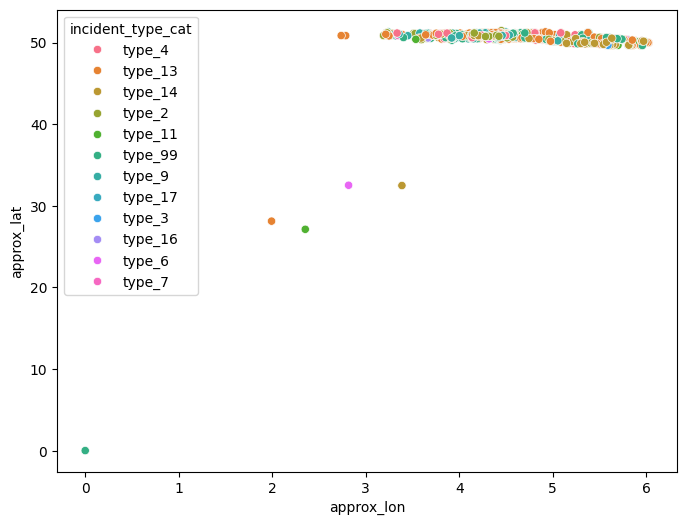

In [242]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='approx_lon', y='approx_lat', hue='incident_type_cat', data=df)

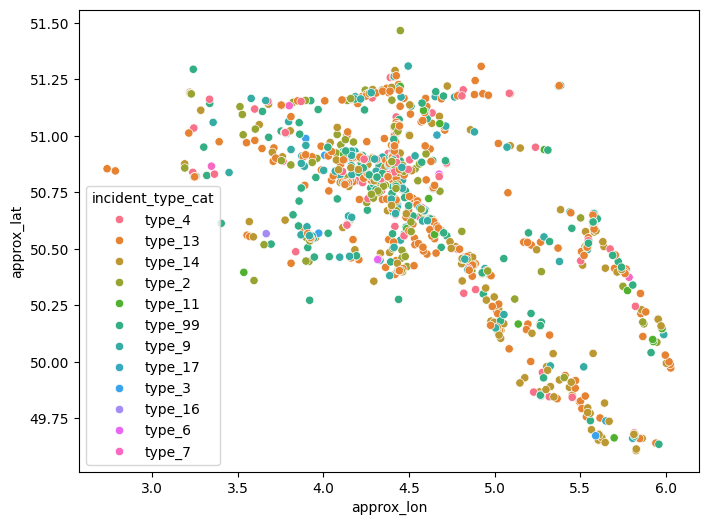

In [248]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='approx_lon', y='approx_lat', hue='incident_type_cat', data=df[df['approx_lat']>40])
plt.show()

In [254]:
## There are some records with latitude and longitude which dont make sense at all i think the geopositioning wasn't working for them
## Even for the incidents with normal latitude and longitude can't see a conclusive cluster

## Diving Deep Into vehicles sequence

In [385]:
sub_df = df[['pre_incident_vehicles_sequence','incident_type_cat']]
sub_df = sub_df.dropna().reset_index(drop=True)

In [386]:
def get_frequency_count(lst):
    
    freq_count = {}
    for item in lst:
        if item in freq_count:
            freq_count[item] += 1
        else:
            freq_count[item] = 1

    majority_value = 0
    sum_of_freq = 0

    for item, value in freq_count.items():
        sum_of_freq += value
        if value > majority_value:
            majority_value = value


    highest_freq_value_percentage = majority_value/sum_of_freq

    return freq_count, highest_freq_value_percentage

sub_df[['frequency_vehicle_dict','percentage_highest_freq']] = sub_df['pre_incident_vehicles_sequence'].apply(lambda x:get_frequency_count(x)).apply(pd.Series)
sub_df['unique_vehicle_sequence'] = sub_df['pre_incident_vehicles_sequence'].apply(lambda x:get_unique_events(x))

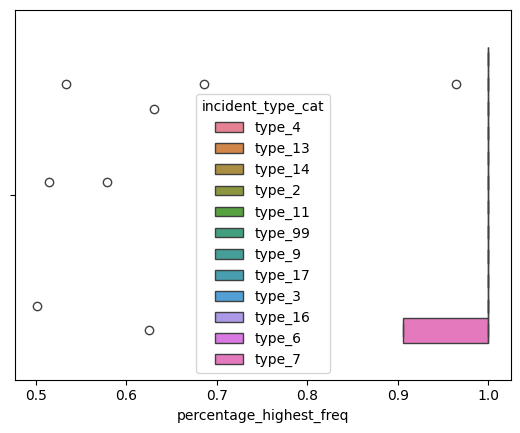

In [387]:
sns.boxplot(data=sub_df,hue='incident_type_cat',x='percentage_highest_freq')
plt.show()

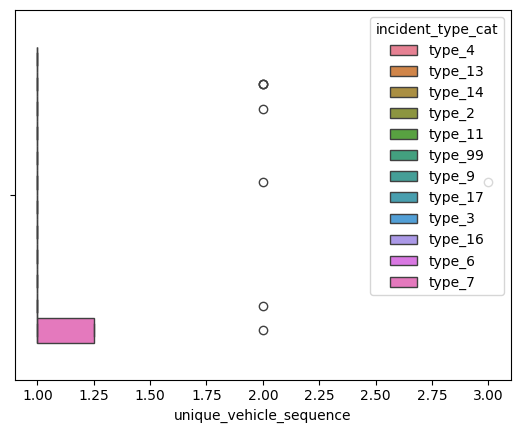

In [388]:
sns.boxplot(data=sub_df,hue='incident_type_cat',x='unique_vehicle_sequence')
plt.show()

In [279]:
## If unique vehicle sequence > 1 then the train length is long and assumption is that it is heavily crowded on main line

0.625

In [292]:
temp_df = df[['pre_incident_vehicles_sequence','incident_type','approx_lat','approx_lon']]
temp_df = temp_df.dropna().reset_index(drop=True)
temp_df['unique_vehicle_sequence'] = temp_df['pre_incident_vehicles_sequence'].apply(lambda x:get_unique_events(x))

In [294]:
temp_df[temp_df['unique_vehicle_sequence']>1]

pre_incident_vehicles_sequence  incident_type  \
354  [544, 544, 544, 544, 544, 544, 544, 544, 544, ...             99   
461  [594, 594, 594, 594, 594, 594, 594, 594, 594, ...              7   
474  [1007, 1007, 1007, 1007, 1007, 1007, 1007, 100...             14   
753  [558, 558, 558, 558, 558, 558, 558, 558, 558, ...             99   
826  [507, 507, 507, 508, 508, 508, 508, 508, 508, ...             13   
860  [549, 549, 549, 549, 549, 549, 549, 549, 549, ...              6   
917  [1006, 1006, 1006, 1006, 1006, 1006, 1006, 100...             13   
948  [588, 588, 588, 588, 588, 588, 588, 588, 588, ...             13   

     approx_lat  approx_lon  unique_vehicle_sequence  
354   50.398816    4.464036                        2  
461   50.865673    3.346778                        2  
474   50.357869    4.811092                        2  
753   50.837176    4.208370                        3  
826   50.412468    4.464851                        2  
860   50.452170    4.318044                        2  
917   50.245322    4.986630                        2  
948   50.905734    4.214227                        2

## Diving Deep into pre_incident_events_sequence

In [379]:
sub_df = df[['pre_incident_events_sequence','incident_type_cat']]
sub_df = sub_df.dropna().reset_index(drop=True)

In [380]:
sub_df[['frequency_event_dict','percentage_highest_freq_event']] = sub_df['pre_incident_events_sequence'].apply(lambda x:get_frequency_count(x)).apply(pd.Series)
sub_df['unique_events_sequence'] = sub_df['pre_incident_events_sequence'].apply(lambda x:get_unique_events(x))

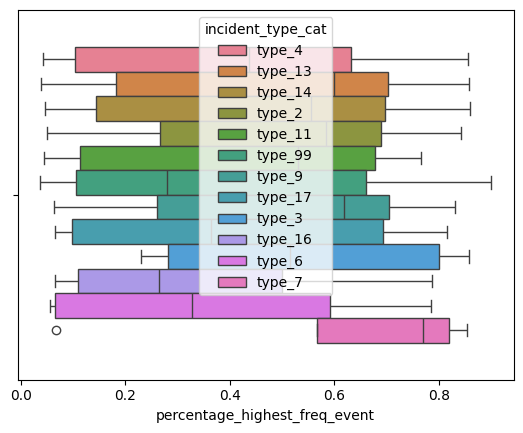

In [383]:
sns.boxplot(data=sub_df,hue='incident_type_cat',x='percentage_highest_freq_event')
plt.show()

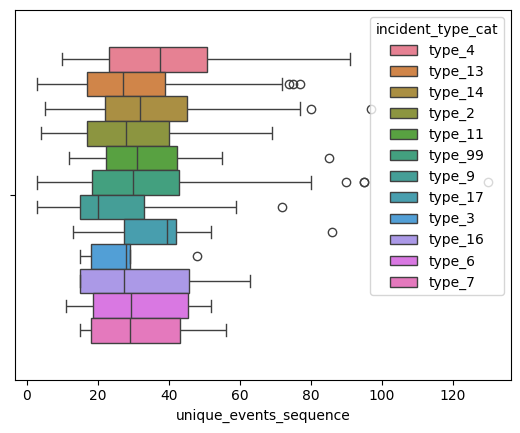

In [384]:
sns.boxplot(data=sub_df,hue='incident_type_cat',x='unique_events_sequence')
plt.show()

In [306]:
## percentage_highest_frequency_events looks indicative for the incident_type

In [313]:
sub_df['unique_events_sequence'].describe()

count    1010.000000
mean       31.255446
std        16.479139
min         3.000000
25%        18.000000
50%        29.000000
75%        42.000000
max       130.000000
Name: unique_events_sequence, dtype: float64

In [344]:
def generate_wordcloud_by_label(df, list_column, target_column):
    """
    Generate a wordcloud for each unique target label based on the associated lists.
    
    Parameters:
    df (pandas.DataFrame): The input DataFrame
    list_column (str): The name of the column containing the lists
    target_column (str): The name of the column containing the target labels
    """
    unique_labels = df[target_column].unique()

    for label in unique_labels:

        label_data = df[df[target_column] == label][list_column].explode().tolist()
        label_data = [str(int(x))+'_event' for x in label_data]
        text = ' '.join(label_data)
        wordcloud = WordCloud(max_font_size=50, max_words=100, background_color='white',collocations=False).generate(text)
        plt.figure(figsize=(10, 6))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f"Word Cloud for Target Label: {label}")
        plt.show()

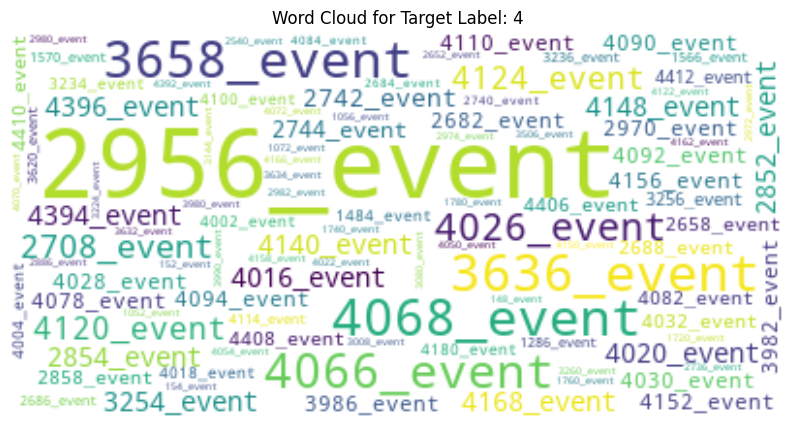

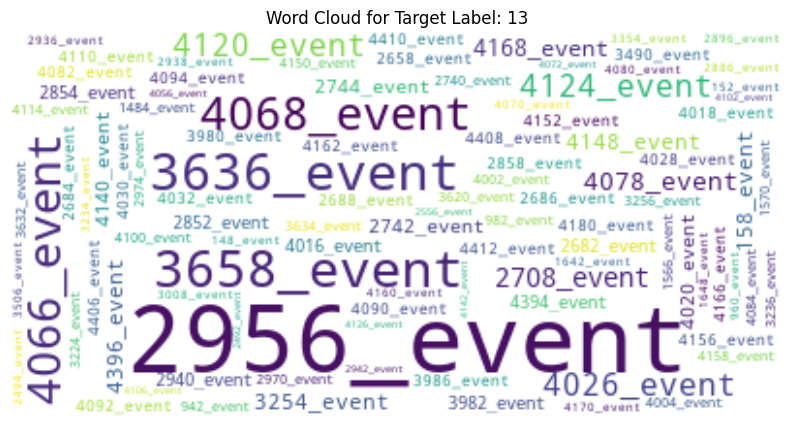

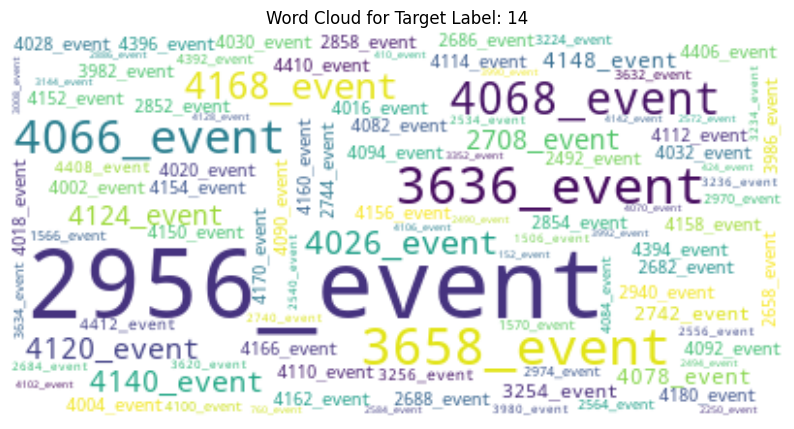

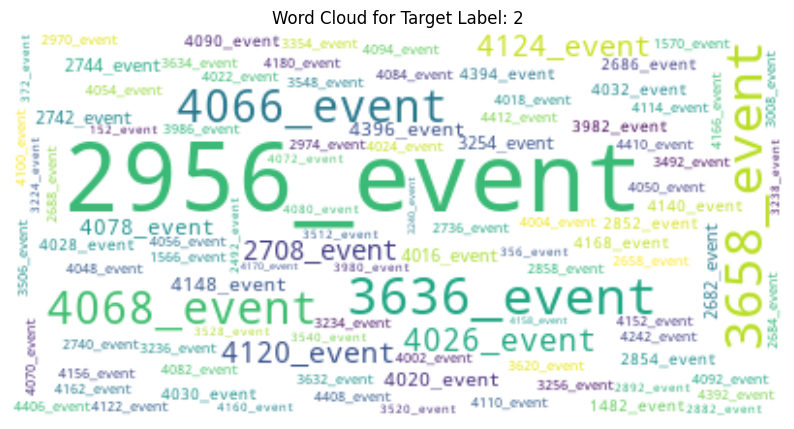

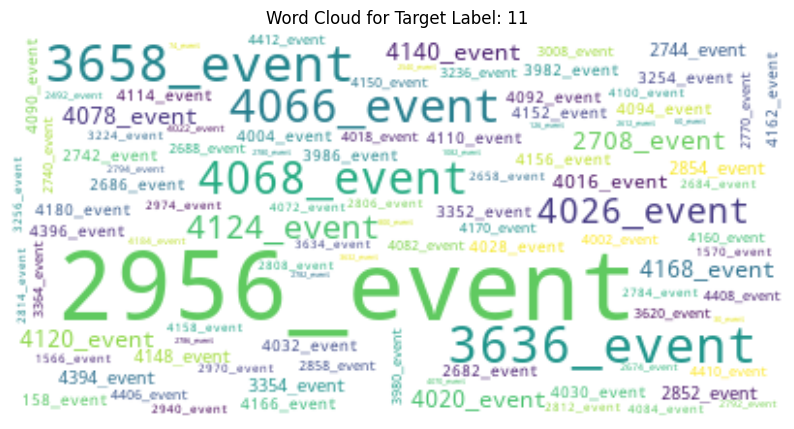

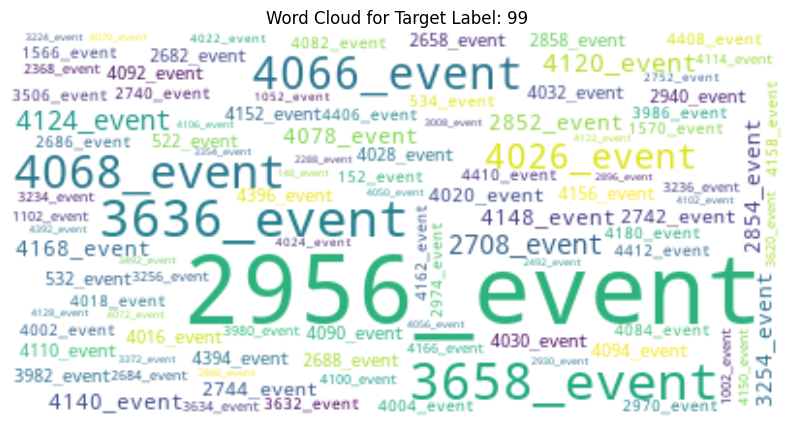

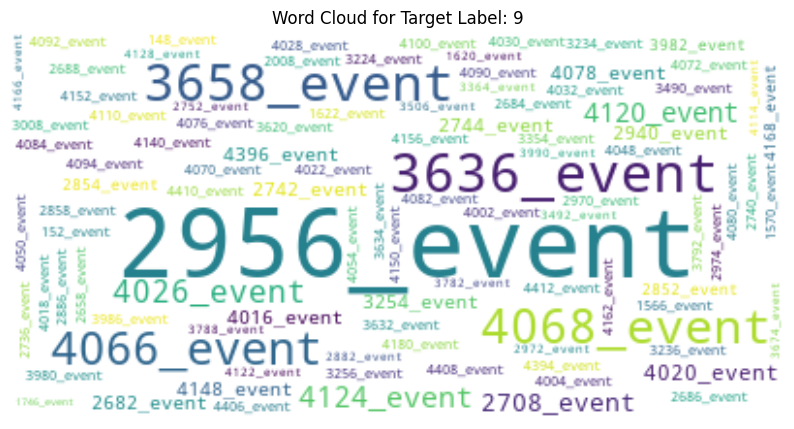

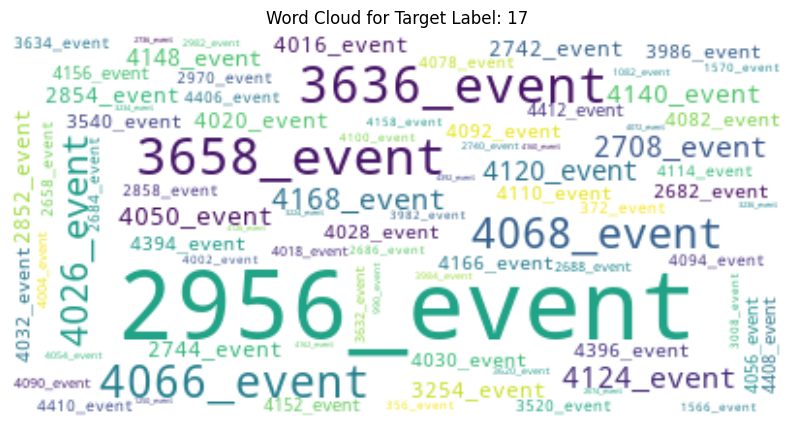

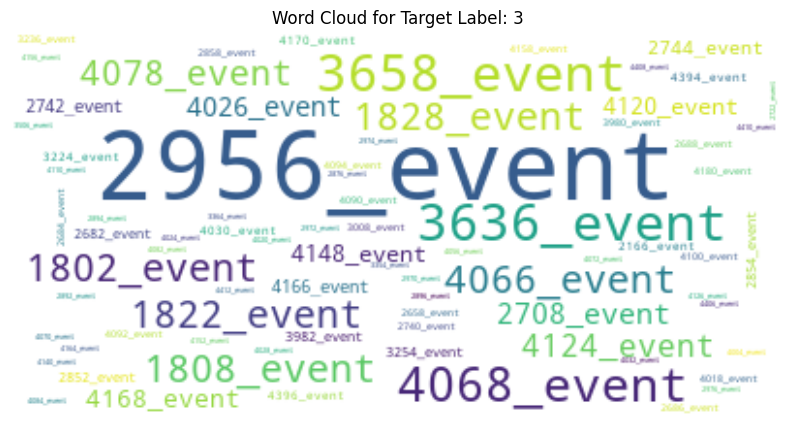

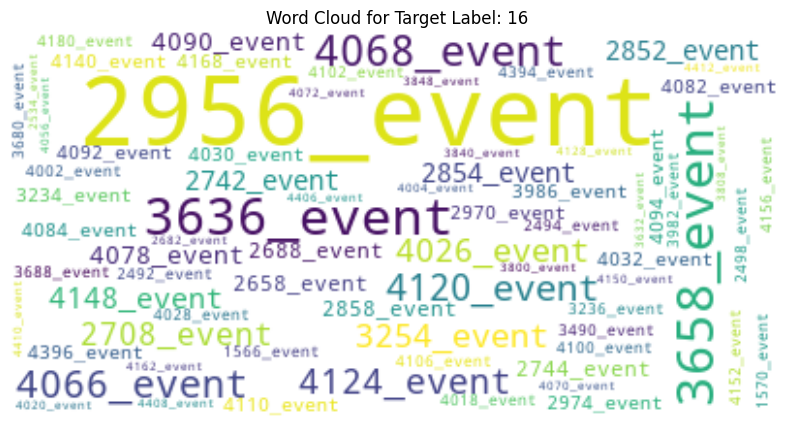

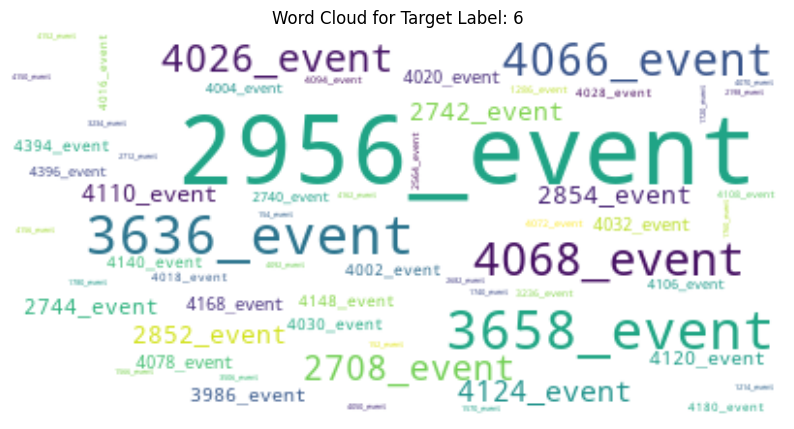

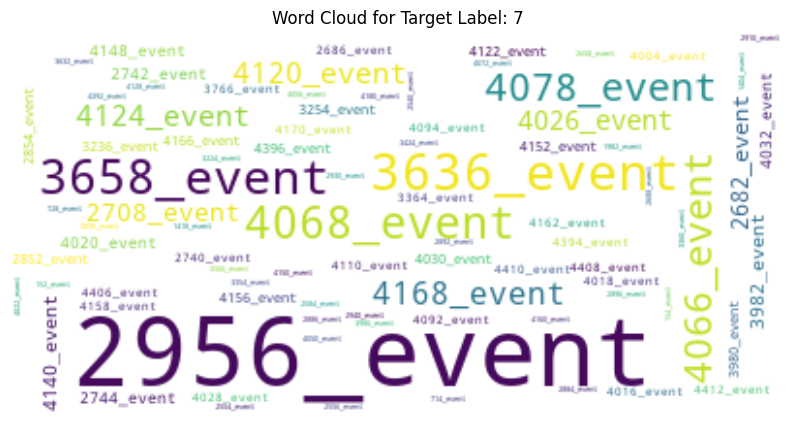

In [345]:
generate_wordcloud_by_label(sub_df,'pre_incident_events_sequence','incident_type')

## Diving Deep Into train_kph_sequence

In [390]:
sub_df = df[['pre_incident_train_kph_sequence','incident_type_cat']]
sub_df = sub_df.dropna().reset_index(drop=True)

In [391]:
def get_mean_and_median(lst):

    new_lst = []
    for x in lst:
        new_lst.append(float(x))

    new_lst = np.array(new_lst)

    return np.mean(new_lst),np.median(new_lst)



sub_df[['avg_speed_pre_incident','median_speed_pre_incident']] = sub_df['pre_incident_train_kph_sequence'].apply(lambda x:get_mean_and_median(x)).apply(pd.Series)

In [392]:
sub_df['diff_avg_and_median'] = sub_df['avg_speed_pre_incident'] - sub_df['median_speed_pre_incident']

<Axes: xlabel='diff_avg_and_median'>

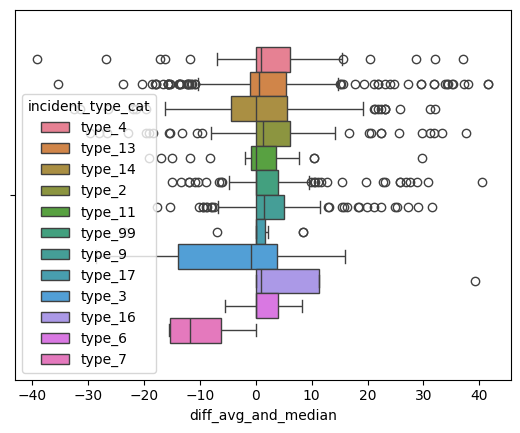

In [393]:
sns.boxplot(data=sub_df,hue='incident_type_cat',x='diff_avg_and_median')

<Axes: xlabel='avg_speed_pre_incident'>

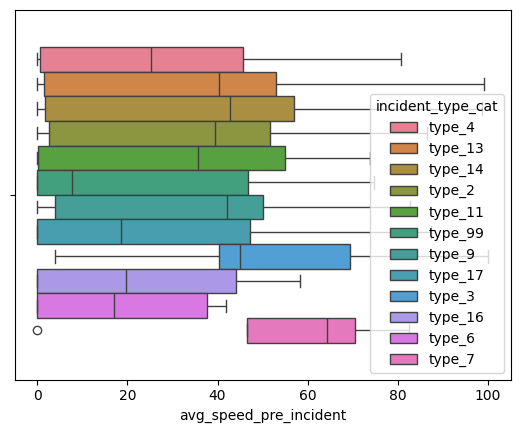

In [394]:
sns.boxplot(data=sub_df,hue='incident_type_cat',x='avg_speed_pre_incident')

<Axes: xlabel='median_speed_pre_incident'>

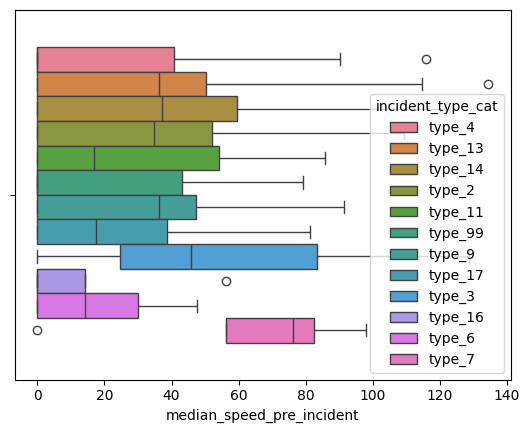

In [395]:
sns.boxplot(data=sub_df,hue='incident_type_cat',x='median_speed_pre_incident')

In [397]:
sub_df['diff_avg_and_median'].describe()

count    1010.000000
mean        2.028595
std         9.925397
min       -39.103333
25%         0.000000
50%         0.441121
75%         5.364263
max        41.624419
Name: diff_avg_and_median, dtype: float64

In [401]:
def get_category(x):
    if x<0:
        return "decelerate"
    elif x==0:
        return "unknown"
    
    return "accelerate"

sub_df['speed_category'] = sub_df['diff_avg_and_median'].apply(lambda x:get_category(x))

In [408]:
sub_df.groupby(by=['speed_category','incident_type_cat'])['pre_incident_train_kph_sequence'].count().unstack().fillna(0)

incident_type_cat  type_11  type_13  type_14  type_16  type_17  type_2  \
speed_category                                                           
accelerate            12.0    187.0     78.0      2.0      6.0    86.0   
decelerate             7.0     85.0     49.0      0.0      2.0    27.0   
unknown                7.0     46.0     22.0      2.0      2.0     6.0   

incident_type_cat  type_3  type_4  type_6  type_7  type_9  type_99  
speed_category                                                      
accelerate            2.0    52.0     2.0     1.0    88.0     87.0  
decelerate            3.0    11.0     1.0     3.0    25.0     33.0  
unknown               0.0    15.0     3.0     0.0     4.0     54.0

## Diving Deep into dj_ac_state_sequence , dj_dc_state_sequence

In [409]:
sub_df = df[['pre_incident_dj_ac_state_sequence','pre_incident_dj_dc_state_sequence','incident_type_cat']]
sub_df = sub_df.dropna().reset_index(drop=True)

In [411]:
sub_df['unique_pre_incident_dj_ac_state_sequence'] = sub_df['pre_incident_dj_ac_state_sequence'].apply(lambda x:get_unique_events(x))
sub_df['unique_pre_incident_dj_dc_state_sequence'] = sub_df['pre_incident_dj_dc_state_sequence'].apply(lambda x:get_unique_events(x))

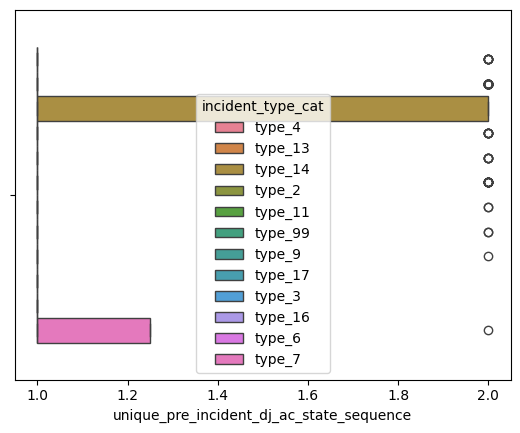

In [415]:
sns.boxplot(data=sub_df,hue='incident_type_cat',x='unique_pre_incident_dj_ac_state_sequence')
plt.show()

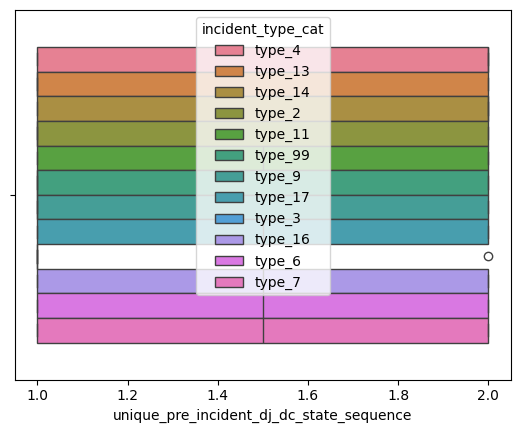

In [416]:
sns.boxplot(data=sub_df,hue='incident_type_cat',x='unique_pre_incident_dj_dc_state_sequence')
plt.show()

In [434]:
def get_events_counts(lst_1,lst_2):
    
        count_f_f = 0
        count_f_t = 0
        count_t_f = 0
        count_t_t = 0

        for i in range(0,len(lst_1)):
                
                if (lst_1[i]=='True')and (lst_2[i]=='True'):
                        count_t_t += 1
                elif (lst_1[i]=='False') and (lst_2[i]=='True'):
                        count_f_t += 1
                elif (lst_1[i]=='True')and (lst_2[i]=='False'):
                        count_t_f += 1
                else:
                        count_f_f += 1 


        return count_t_t, count_f_t,count_t_f, count_f_f

In [435]:
sub_df[['count_t_t','count_f_t','count_t_f','count_f_t']] = sub_df[['pre_incident_dj_ac_state_sequence','pre_incident_dj_dc_state_sequence']].apply(lambda row:get_events_counts(row['pre_incident_dj_ac_state_sequence'],row['pre_incident_dj_dc_state_sequence']),axis=1).apply(pd.Series)


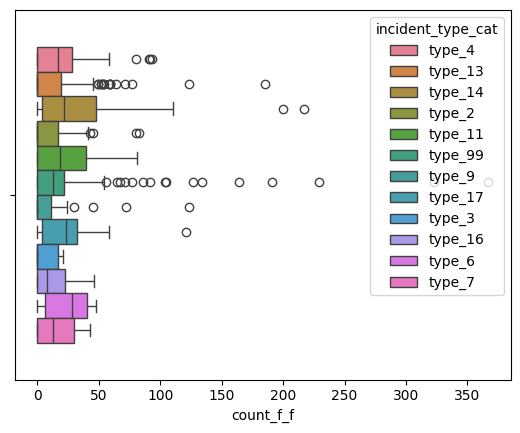

In [436]:
sns.boxplot(data=sub_df,hue='incident_type_cat',x='count_f_f')
plt.show()

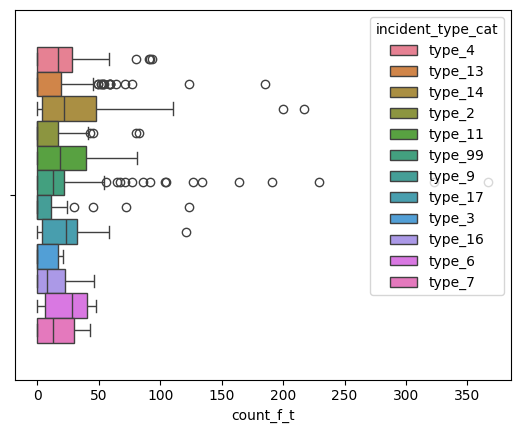

In [437]:
sns.boxplot(data=sub_df,hue='incident_type_cat',x='count_f_t')
plt.show()

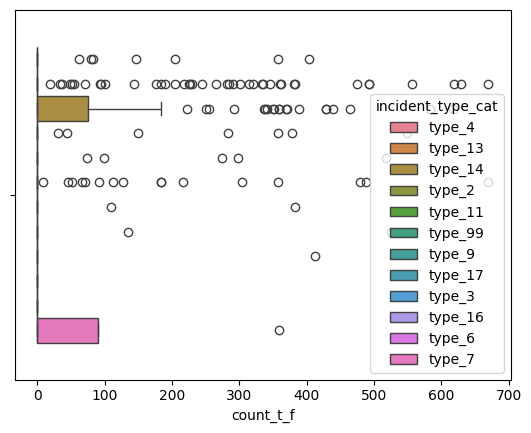

In [438]:
sns.boxplot(data=sub_df,hue='incident_type_cat',x='count_t_f')
plt.show()

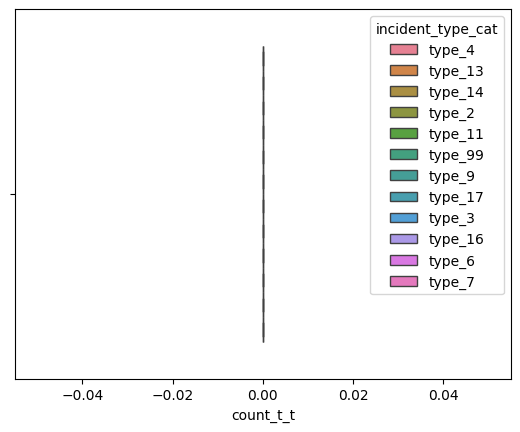

In [439]:
sns.boxplot(data=sub_df,hue='incident_type_cat',x='count_t_t')
plt.show()

## Make a dictionary out of the events

In [458]:
def make_dict(row):

    data = dict()

    for seconds,vehicle_id,event_id,ac_state,dc_state,train_speed in zip(row['pre_incident_seconds_to_incident_sequence'],\
                                                                     row['pre_incident_vehicles_sequence'],\
                                                                     row['pre_incident_events_sequence'],\
                                                                     row['pre_incident_dj_ac_state_sequence'],\
                                                                     row['pre_incident_dj_dc_state_sequence'],\
                                                                     row['pre_incident_train_kph_sequence']) :

        if seconds not in data.keys():
            data[seconds] = {
                vehicle_id : {
                    event_id : {
                        "train_speed": train_speed,
                        "ac_state" : ac_state,
                        "dc_state":dc_state
                    }
                }
            }
        elif vehicle_id not in data[seconds].keys():
               data[seconds]={
                   vehicle_id:{
                    event_id : {
                        "train_speed": train_speed,
                        "ac_state" : ac_state,
                        "dc_state":dc_state
                    }
                }
               }
        elif event_id not in data[seconds][vehicle_id].keys():
                    data[seconds][vehicle_id] = {
                                        event_id : {
                                        "train_speed": train_speed,
                                        "ac_state" : ac_state,
                                        "dc_state":dc_state
                                    }
                    }


    return data


In [460]:
sub_df = df.copy()

In [461]:
sub_df = sub_df.dropna().reset_index(drop=True)

In [462]:
sub_df['sequence_dict'] = sub_df.apply(lambda row:make_dict(row),axis=1)

In [473]:
sub_df['seconds_captured'] = sub_df['sequence_dict'].apply(lambda x:len(x.keys()))

In [474]:
sub_df['seconds_captured'].describe()

count     991.000000
mean      239.948537
std       179.686383
min         2.000000
25%        72.500000
50%       209.000000
75%       369.500000
max      1033.000000
Name: seconds_captured, dtype: float64

In [477]:
sub_df[sub_df['seconds_captured']>72].shape[0]/sub_df.shape[0]

0.7497477295660948

(991, 25)